# Обработка и анализ данных социальной сети

## Введение
Социальные сети стали повсеместной частью современной жизни, а такие платформы, как Instagram, Twitter и Facebook, служат основными каналами связи. Наборы данных социальных сетей обширны и сложны, что делает анализ сложной задачей как для предприятий, так и для исследователей. В этом проекте мы исследуем смоделированные социальные сети, набор данных Tweets, чтобы понять тенденции в лайках по разным категориям.

## Описание проекта

Цель этого проекта — анализ твитов (или других данных социальных сетей) и получение информации о вовлеченности пользователей. Мы изучим набор данных с помощью методов визуализации, чтобы понять распределение лайков по разным категориям. Наконец, мы проанализируем данные, чтобы сделать выводы о самых популярных категориях и общей вовлеченности на платформе.

## План проекта

1. Загрузка библиотек
2. Обзор данных
3. Предобработка данных
4. Исследовательский анализ
5. Визуализация 
6. Выводы и рекомендации

### 1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random 

### 2. Обзор данных

In [2]:
# создаем набор данных
# создадим список категорий

categories = ['health', 'food', 'family', 'fashion', 'music', 'travel', 'fitness', 'culture']

# Создадим словарь с названиями столбцов и значениями
data = {'Date': pd.date_range('2022-08-01', periods=500),
        'Category': [random.choice(categories) for _ in range(500)],
        'Likes': np.random.randint(0, 10000, size=500)}
        

In [3]:
# Создадим датафрейм на основе сгенерированных данных 
df = pd.DataFrame(data)

In [4]:
# выведем первые строки
df.head(5)

,Date,Category,Likes
0,2022-08-01,health,328
1,2022-08-02,health,4306
2,2022-08-03,family,732
3,2022-08-04,fitness,4088
4,2022-08-05,food,3311


In [5]:
# Посмотрим описание
df.describe()

,Likes
count,500.000000
mean,5005.614000
std,2939.552733
min,8.000000
25%,2389.000000
50%,5008.500000
75%,7669.750000
max,9999.000000


In [6]:
# Посмотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB


#### Результат:
Из общей информации датафрейма видим, что столбцы имеют нужные типы данных, соответственно, их не нужно обрабатывать дополнительно. 
Далее мы проведем предобработку данных.

### 3. Предобработка данных

#### Очистка пустых значений

In [7]:
df.isna().sum()

Date        0
Category    0
Likes       0
dtype: int64

Пустых значений нет.

#### Удаление дубликатов

In [8]:
df.duplicated().sum()

0

Дубликатов в данных не обнаружено.

#### Результат:
Данные очищены, можно приступать к исследовательскому анализу.

### 4. Исследовательский анализ данных (EDA)

Для начала посмотрим гистограмму по лайкам.

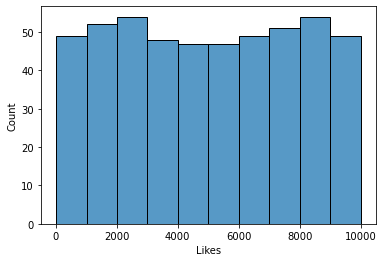

In [9]:
sns.histplot(df['Likes'])
plt.show()

Лайки распределены почти равномерно с неявным подъемом от 1500 до 3000.

Посмотрим диаграмму распределения лайков по категориям.

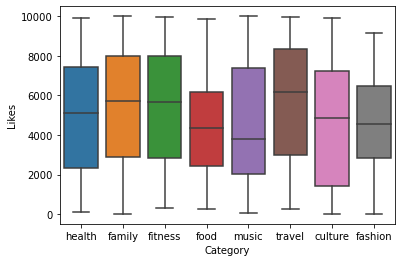

In [10]:
sns.boxplot(x='Category', y='Likes', data=df)
plt.show()

Стоит выстроить категории по убыванию медианного числа лайков, чтоб было нагляднее.

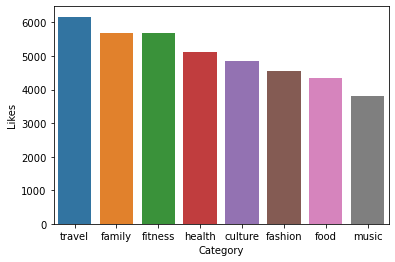

In [19]:
Likes_median_sort = (
    df.pivot_table(index='Category', values='Likes', aggfunc='median')
    .sort_values(by='Likes', ascending=False)
)

sns.barplot(x=Likes_median_sort.index, y='Likes', data=Likes_median_sort)
plt.show()

Теперь видно, что категория travel имеет наибольшее значение медианы лайков, а категория music наименьшее. Посмотрим медианное значение столбца лайков.

In [27]:
df['Likes'].median()

5008.5

In [28]:
df.groupby(['Category'])[['Likes']].median().sort_values(by='Likes', ascending=False)

,Likes
Category,
travel,6171.5
family,5701.0
fitness,5673.0
health,5122.0
culture,4859.0
fashion,4543.0
food,4339.0
music,3810.0


Первые 4 категории выше среднего, последние 4 категории ниже среднего. В топ-3 вошли категории: путешествия, семья, фитнес. Также, категория здоровье немного выше медианного значения. 

### 5. Визуализируем результат

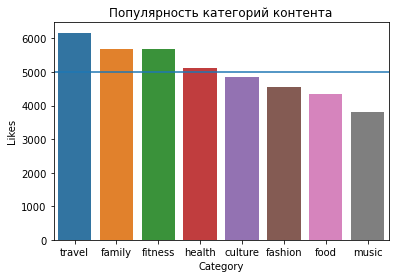

In [39]:
sns.barplot(x=Likes_median_sort.index, y='Likes', data=Likes_median_sort)
plt.title('Популярность категорий контента')
plt.axhline(y=df['Likes'].median())
plt.show()

### Выводы и рекомендации

В ходе исследования были изучены данные постов социальной сети, а именно категории и лайки. Проведена предобработка и исследовательский анализ. После чего были выявлены популярные категории контента: Путешествия, Семья, Фитнес и Здоровье. 
На данный момент лидирует категория путешествия, соответственно, рекомендуем сфокусировать тренды на ней, а также прикреплять к непопулярным категориям теги с лидирующей категорией, для поднятия просмотров.